In [12]:
    import os
os.getcwd()

'/kaggle/input/optiver-realized-volatility-prediction'

In [13]:
os.chdir('/kaggle/input/optiver-realized-volatility-prediction')

In [14]:
print(os.listdir("."))

['trade_train.parquet', 'sample_submission.csv', 'book_test.parquet', 'trade_test.parquet', 'book_train.parquet', 'train.csv', 'test.csv']


In [15]:
import pandas as pd

In [16]:
df_sample_submission = pd.read_csv('./sample_submission.csv')
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [17]:
import ipywidgets as widgets
#import matplotlib.pyplot as plt

from pathlib import Path

data_dir = Path('./')

df_names = ['sample_submission', 'train', 'test']

for name in df_names:
    globals()[name] = pd.read_csv(data_dir / f"{name}.csv")

kaggle_data_tabs = widgets.Tab()
# Add Output widgets for each pandas DF as tabs' children
kaggle_data_tabs.children = list([widgets.Output() for df_name in df_names])

for index in range(0, len(df_names)):
    # Rename tab bar titles to df names
    kaggle_data_tabs.set_title(index, df_names[index])
    
    # Display corresponding table output for this tab name
    with kaggle_data_tabs.children[index]:
        display(eval(df_names[index]))

display(kaggle_data_tabs)

In [18]:
df_train.describe()

,stock_id,time_id,target
count,428932.000000,428932.000000,428932.000000
mean,62.437944,16038.972721,0.003880
std,37.126450,9365.103706,0.002936
min,0.000000,5.000000,0.000105
25%,30.000000,7854.000000,0.002026
50%,63.000000,15853.000000,0.003048
75%,96.000000,23994.000000,0.004738
max,126.000000,32767.000000,0.070321


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428932 entries, 0 to 428931
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   stock_id  428932 non-null  int64  
 1   time_id   428932 non-null  int64  
 2   target    428932 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 9.8 MB


In [20]:
df_train.describe()

,stock_id,time_id,target
count,428932.000000,428932.000000,428932.000000
mean,62.437944,16038.972721,0.003880
std,37.126450,9365.103706,0.002936
min,0.000000,5.000000,0.000105
25%,30.000000,7854.000000,0.002026
50%,63.000000,15853.000000,0.003048
75%,96.000000,23994.000000,0.004738
max,126.000000,32767.000000,0.070321


In [21]:
df_train.stock_id.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  46,  47,  48,  50,  51,  52,  53,  55,  56,  58,
        59,  60,  61,  62,  63,  64,  66,  67,  68,  69,  70,  72,  73,
        74,  75,  76,  77,  78,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       118, 119, 120, 122, 123, 124, 125, 126])

In [22]:
df_train.time_id.unique()

array([    5,    11,    16, ..., 32758, 32763, 32767])

In [30]:
df_train_s0_s20 = df_train[df_train['stock_id'] <= 20]
df_train_s0_s20.head(10)

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747
5,0,72,0.004912
6,0,97,0.009388
7,0,103,0.004120
8,0,109,0.002182
9,0,123,0.002669


In [25]:
import numpy as np

# Select time_id, count(stock_id) cnt_stk, mean(stock_id), min(stock_id) min_stk, max(stock_id) max_stk, count(target) cnt_trg
print(df_train_s0_s10[['stock_id', 'time_id']].set_index("stock_id").select_dtypes(np.number).stack().groupby(level=0).describe())

# Select stock_id, count(target) cnt_trg, min(target) min_trg, max(target) max_trg etc
print(df_train_s0_s10[['stock_id', 'target']].set_index("stock_id").select_dtypes(np.number).stack().groupby(level=0).describe())

           count          mean          std  min     25%      50%      75%  \
stock_id                                                                     
0         3830.0  16038.933681  9366.261949  5.0  7856.5  15852.5  23988.5   
1         3830.0  16038.933681  9366.261949  5.0  7856.5  15852.5  23988.5   
2         3830.0  16038.933681  9366.261949  5.0  7856.5  15852.5  23988.5   
3         3830.0  16038.933681  9366.261949  5.0  7856.5  15852.5  23988.5   
4         3830.0  16038.933681  9366.261949  5.0  7856.5  15852.5  23988.5   
5         3830.0  16038.933681  9366.261949  5.0  7856.5  15852.5  23988.5   
6         3830.0  16038.933681  9366.261949  5.0  7856.5  15852.5  23988.5   
7         3830.0  16038.933681  9366.261949  5.0  7856.5  15852.5  23988.5   
8         3830.0  16038.933681  9366.261949  5.0  7856.5  15852.5  23988.5   
9         3830.0  16038.933681  9366.261949  5.0  7856.5  15852.5  23988.5   
10        3830.0  16038.933681  9366.261949  5.0  7856.5  15852.

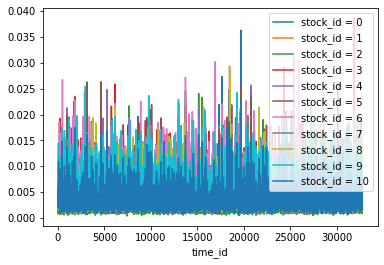

In [26]:
# Reference : utl_multi_line_graph

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for key, grp in df_train_s0_s10.groupby(['stock_id']):
    m_color = 'C' + str(key)
    m_label = 'stock_id = ' + str(key)
    #print(key, '\n', grp, '\n', m_color, '\n\n')
    
    # c parameter stands for color. Its passing value should be a valid color
    ax = grp.plot(ax=ax, kind='line', x='time_id', y='target', c=m_color, label=m_label)

plt.legend(loc='best')
plt.show()

<Figure size 800x2400 with 0 Axes>

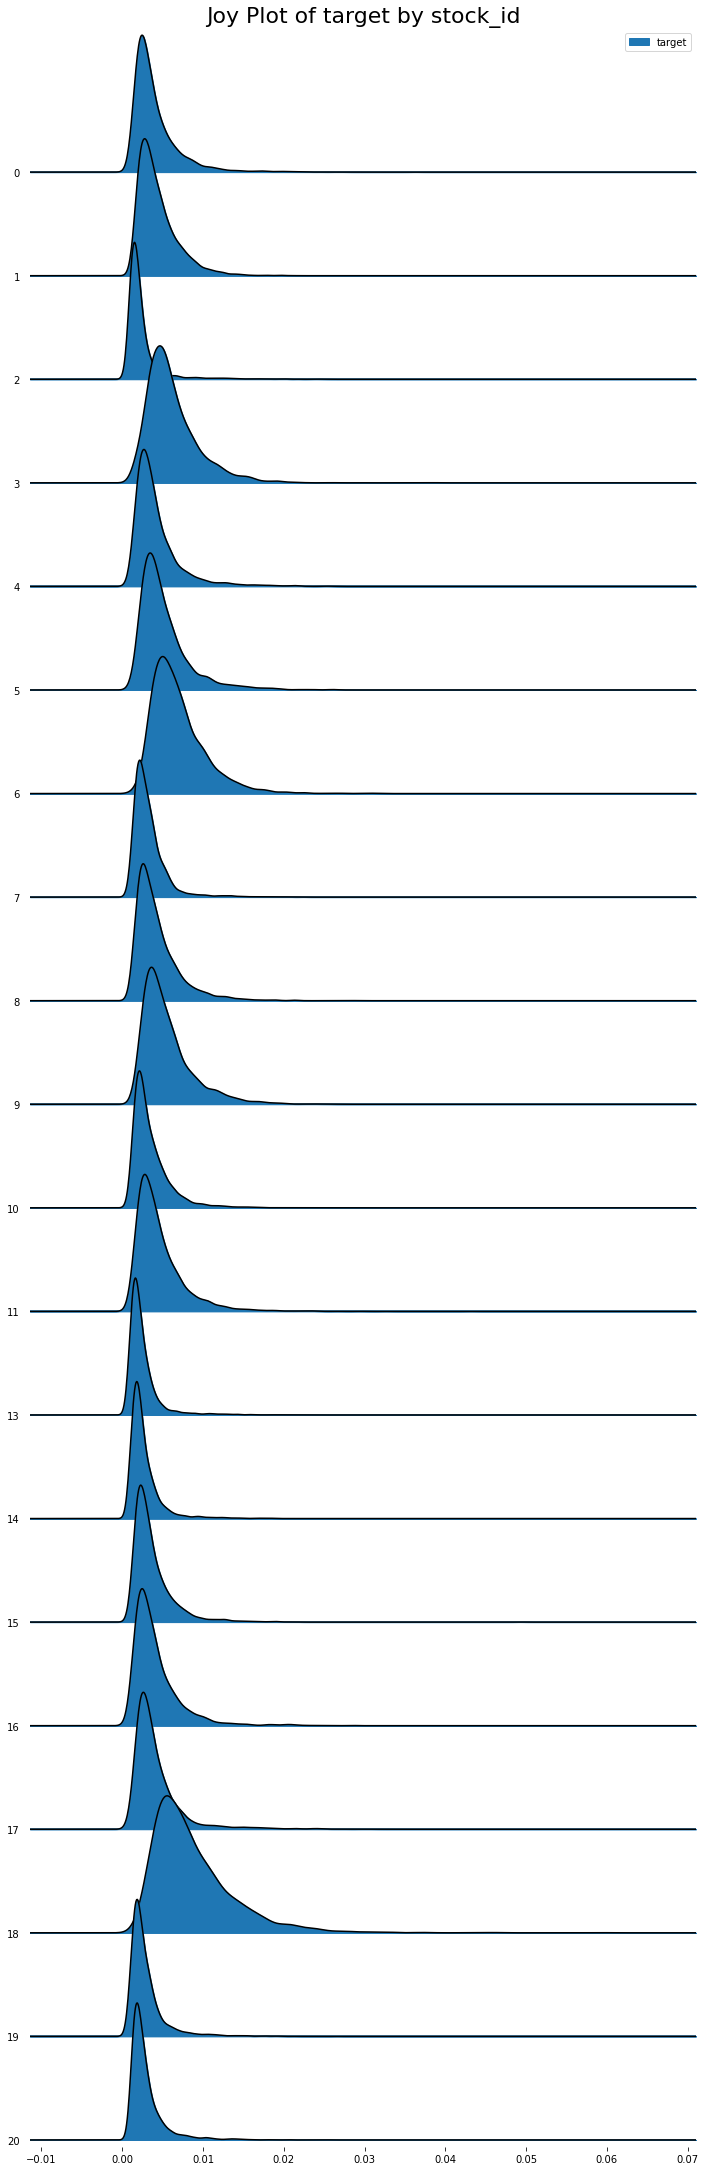

In [42]:
# !pip install joypy
import joypy

# Draw Plot
plt.figure(figsize=(10,30), dpi= 80)
# ylim = limit of y output
# column = all the columns that need to be plotted
# by = x axis
fig, axes = joypy.joyplot(df_train_s0_s20, column=['target'], by="stock_id", ylim='own', figsize=(10,30), legend = True)

# Decoration
plt.title('Joy Plot of target by stock_id', fontsize=22)
plt.show()